# Example NTV

## Goals

- understand the structure of NTV entities
- present the interest and uses of this entities

## summary
(active link on jupyter Notebook or Nbviewer)
- [All JSON data is JSON-NTV data](#All-JSON-data-is-JSON-NTV-data)
- [NTV data is named](#NTV-data-is-named)
- [NTV data is typed](#NTV-data-is-typed)
- [Types can be predefined](#Types-can-be-predefined)
- [Custom types are allowed](#Custom-types-are-allowed)
- [NTV data is nested](#NTV-data-is-nested)
- [NTV-json representation is equivalent to NTV entity](#NTV-json-representation-is-equivalent-to-NTV-entity)
- [Options are available for NTV-json](#Options-are-available-for-NTV-json)
- [Structured entities NtvList and NtvSet are compatible](#Structured-entities-NtvList-and-NtvSet-are-compatible)
- [NTV entities are compatible with tabular data tools](#NTV-entities-are-compatible-with-tabular-data-tools)

## references
- [JSON-NTV specification](https://github.com/loco-philippe/NTV/blob/main/documentation/JSON-NTV-standard.pdf)

This Notebook can also be viewed at [nbviewer](http://nbviewer.org/github/loco-philippe/NTV/tree/main/example)

-----

In [1]:
from ntv import NtvSingle, NtvList, NtvSet, Ntv

## All JSON data is JSON-NTV data
NTV entities : 
- NtvSingle : primitive entity which is not composed of any other entity
- NtvList : ordered sequence of NTV entities
- NtvSet : unordered collection of named NTV entities

In [2]:
liste = [None, 1, [1,2], {'key': 'value'}, {'key1': 'val1', 'key2': 'val2'}, 
         {'example': [21, [1,2], {'key1': 3, 'key2': 4}]}]
for json in liste:
    ntv = Ntv.obj(json)
    print('{:<50} {} {}'.format(str(ntv), 'NTV entity : ', type(ntv)))

null                                               NTV entity :  <class 'ntv.NtvSingle'>
1                                                  NTV entity :  <class 'ntv.NtvSingle'>
[1, 2]                                             NTV entity :  <class 'ntv.NtvList'>
{"key": "value"}                                   NTV entity :  <class 'ntv.NtvSingle'>
{"key1": "val1", "key2": "val2"}                   NTV entity :  <class 'ntv.NtvSet'>
{"example": [21, [1, 2], {"key1": 3, "key2": 4}]}  NTV entity :  <class 'ntv.NtvList'>


## NTV data is named
- a name can be added or remove

In [3]:
simple = Ntv.obj(3)

print('simple data              : ', simple)
simple.set_name('value')
print('simple data with name    : ', simple)
simple.set_name('')
print('simple data without name : ', simple)

simple data              :  3
simple data with name    :  {"value": 3}
simple data without name :  3


## NTV data is typed
- default type is 'json'


In [4]:
# {':json' : 21} and 21 are equivalent
number = 21
typed_number = {':json' : 21}
comparison = Ntv.obj(typed_number) == Ntv.obj(number)
print("Are {':json' : 21} and 21 equivalent ? ", comparison)

Are {':json' : 21} and 21 equivalent ?  True


## Types can be predefined
- many standard types are included

{'paris': <shapely.geometry.point.Point object at 0x000001EFD72A04F0>}


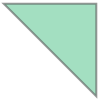

In [5]:
# {'paris:point' : [4.1, 40.5] } indicates that the object named 'paris' has geographical coordinates [4.1, 40.5]
city = Ntv.obj({'paris:point' : [4.1, 40.5] })
print(city.to_obj(encode_format='obj'))

# another coordinates are available (e.g. line, polygon)
city = Ntv.obj({':polygon' : [[[0,1], [1,1], [1,0], [0,1]]] })
city.to_obj(encode_format='obj')

## Custom types are allowed
For example:
- object defined by a list of parameters
- object defined by a list of key/values.

In [6]:
measurement = Ntv.obj({':$sensor': [3.51, 4.2, 'mg/m3', [4.1, 45.2]]})

print('measurement : ', measurement)
print('infos : ', measurement[1], measurement[3], measurement.type_str, '\n')

person = Ntv.obj({'main Breaking Bad character:$character': {'surname': 'white', 'first name': 'walter', 'alias': 'heisenberg'}})

print('personage : ', person)
print('infos : ', person['alias'], person.type_str)

measurement :  {":$sensor": [3.51, 4.2, "mg/m3", [4.1, 45.2]]}
infos :  4.2 [4.1, 45.2] $sensor 

personage :  {"main Breaking Bad character:$character": {"surname": "white", "first name": "walter", "alias": "heisenberg"}}
infos :  heisenberg $character


## NTV data is nested
- Two structures with ordered or non ordered collections are available
- The type can be shared between entities included in the same entity
- The type defined in a structure is a default type
- Two NTV structures are equal if the name and the value are equals (the default type can be different)

In [7]:
# ordered structure
cities1 = Ntv.obj({'cities':        [{'paris:point': [4.1, 40.5]}, {':point': [4.5, 41.2]}]})
cities2 = Ntv.obj({'cities::point': [{'paris':       [4.1, 40.5]},            [4.5, 41.2] ]})

# unordered structure
cities3 = Ntv.obj({'cities::point': {'paris':       [4.1, 40.5], 'lyon':       [4.5, 41.2]}})
cities4 = Ntv.obj({'cities':        {'paris:point': [4.1, 40.5], 'lyon:point': [4.5, 41.2]}})

print('equivalent structures ? ', cities1 == cities2 and cities3 == cities4)

# default type in a structure
cities5 = Ntv.obj({'cities::point': [{'paris': [4.1, 40.5]}, [4.5, 41.2], {':date': '2012-02-15'}]})
print('coordinates and date in a typed structure : ', cities5)

equivalent structures ?  True
coordinates and date in a typed structure :  {"cities::point": [{"paris": [4.1, 40.5]}, [4.5, 41.2], {":date": "2012-02-15"}]}


## NTV-json representation is equivalent to NTV entity
- The entity build with the Json representation of another entity is identical to the original NTV entity

In [8]:
Ntv.obj(simple. to_obj()) == simple  and \
Ntv.obj(city.   to_obj()) == city    and \
Ntv.obj(cities2.to_obj()) == cities2 and \
Ntv.obj(cities4.to_obj()) == cities4

True

## Options are available for NTV-json
- selected values
- encoded data
- data format

In [9]:
print('Json format   : ', cities2.to_obj())
print('only values   : ', cities2.to_obj(simpleval=True))
print('Json text     : ', cities2.to_obj(encoded=True))
print('Json binary   : ', cities2.to_obj(encode_format='cbor', encoded=True))
print('tuple format  : ', cities2.to_tuple())
print('object format : ', cities2.to_obj(encode_format='obj'))
print('simple Json   : ', cities2.to_repr())
print('Json codes    : ', cities2.to_repr(False, False, False)) 
# Codification : first letter: "v" (NtvSingle), "l" (NtvList), "s" (NtvSet), additional letters: 'N' (named), 'T' (typed)

Json format   :  {'cities::point': [{'paris': [4.1, 40.5]}, [4.5, 41.2]]}
only values   :  [[4.1, 40.5], [4.5, 41.2]]
Json text     :  {"cities::point": [{"paris": [4.1, 40.5]}, [4.5, 41.2]]}
Json binary   :  b'\xa1mcities::point\x82\xa1eparis\x82\xfb@\x10ffffff\xf9Q\x10\x82\xf9D\x80\xfb@D\x99\x99\x99\x99\x99\x9a'
tuple format  :  ('NtvList', 'cities', 'point', [('NtvSingle', 'paris', 'point', [4.1, 40.5]), ('NtvSingle', '', 'point', [4.5, 41.2])])
object format :  {'cities::point': [{'paris': <shapely.geometry.point.Point object at 0x000001EFD72A3CA0>}, <shapely.geometry.point.Point object at 0x000001EFD72A3C10>]}
simple Json   :  {'l-cities-point': ['v-paris-point-[4.1, 40.5]', 'v-point-[4.5, 41.2]']}
Json codes    :  {'lNT': ['vNT', 'vT']}


## Structured entities NtvList and NtvSet are compatible
- if the constraints of the JSON-objects (keys are present and different, the order is respected)

In [14]:
ntv_lis = Ntv.obj({'structured': [{'key1': 'value1'}, {'key2': 'value2'}]})
ntv_set = NtvSet(ntv_lis)

print('ntv - NtvList : ', ntv_lis)
print('ntv - NtvSet  : ', ntv_set)

print('\nAre the entities compatible ?', NtvList(NtvSet(ntv_lis)) == ntv_lis and NtvSet(NtvList(ntv_set)) == ntv_set)

ntv - NtvList :  {"structured": [{"key1": "value1"}, {"key2": "value2"}]}
ntv - NtvSet  :  {"structured": {"key1": "value1", "key2": "value2"}}

Are the entities compatible ? True


## NTV entities are compatible with tabular data tools
- Example with Pandas

In [29]:
from pandas import Series, DataFrame
dates = Ntv.obj({'dates::datetime': ['1964-01-01', '1985-02-05', '2022-01-21']})
dates_series = Series(dates.to_obj(encode_format='obj', simpleval=True), name=dates.ntv_name)

tab = Ntv.obj({'dates::datetime': ['1964-01-01', '1985-02-05', '2022-01-21'], 
               'value': [10, 20, 30],
               'coord::$point': [[1,2], [3,4], [5,6]],
               'name::string': ['john', 'eric', 'judith']})
tab_pandas = DataFrame({ d.ntv_name : pd.Series(d.to_obj(encode_format='obj', simpleval=True)) for d in tab})

print(dates_series, '\n')
print(tab_pandas, '\n')
print(tab_pandas.dtypes)

0   1964-01-01
1   1985-02-05
2   2022-01-21
Name: dates, dtype: datetime64[ns] 

       dates  value   coord    name
0 1964-01-01     10  [1, 2]    john
1 1985-02-05     20  [3, 4]    eric
2 2022-01-21     30  [5, 6]  judith 

dates    datetime64[ns]
value             int64
coord            object
name             object
dtype: object
